In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist=input_data.read_data_sets("MNIST")

X_train=mnist.train.images
y_train=mnist.train.labels
X_test=mnist.test.images
y_test=mnist.test.labels

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST\train-labels-idx1-ubyte.gz
Extracting MNIST\t10k-images-idx3-ubyte.gz
Extracting MNIST\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


INFO:tensorflow:Restoring parameters from model_checkpoints/mnist_auto_encoder1.ckpt


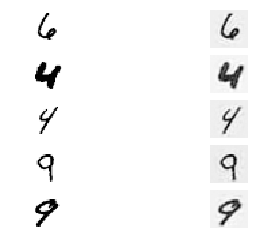

In [74]:
import tensorflow as tf
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
#MNIST
n_inputs=28*28
n_hidden1=300
n_hidden2=150
n_hidden3=n_hidden1
n_outputs=n_inputs

n_epochs=15
batch_size=500

learning_rate=0.001
l2_reg=0.000001

#or use the handy tf dense function
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")

he_init=tf.contrib.layers.variance_scaling_initializer()
l2_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer=partial(tf.layers.dense,activation=tf.nn.elu,
                      kernel_initializer=he_init,
                      kernel_regularizer=l2_regularizer)

hidden1=my_dense_layer(X,n_hidden1,name="hidden1")
hidden2=my_dense_layer(hidden1,n_hidden2,name="hidden2")
hidden3=my_dense_layer(hidden2,n_hidden3,name="hidden3")
outputs=my_dense_layer(hidden3,n_outputs,activation=None,name="outputs")

with tf.name_scope("loss"):
    reconstruction_loss=tf.reduce_mean(tf.square(outputs-X),name="loss")
    reg_loss=tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss=tf.add_n([reconstruction_loss]+reg_loss)
    
with tf.name_scope("train"):
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()
saver=tf.train.Saver()


n_test_digits=5
plot_list=np.random.choice(X_test.shape[0],n_test_digits, replace=False)
X_test_plot=X_test[plot_list]

with tf.Session() as sess:
    init.run()
    try:
        saver.restore(sess, "model_checkpoints/mnist_auto_encoder1.ckpt")
    except:
        print("Model is not compatible with the checkpoint")
        init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch})
        train_mse=reconstruction_loss.eval(feed_dict={X:X_train})
        test_mse=reconstruction_loss.eval(feed_dict={X:X_test})
        print(epoch,"Train MSE: ",train_mse," Test MSE: ",test_mse,end="\r")
    save_path=saver.save(sess,"model_checkpoints/mnist_auto_encoder1.ckpt")
    outputs_val=outputs.eval(feed_dict={X:X_test_plot})

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")

for digit_index in range(n_test_digits):
    plt.subplot(n_test_digits,2,digit_index*2+1)
    plot_image(X_test_plot[digit_index])
    plt.subplot(n_test_digits,2,digit_index*2+2)
    plot_image(outputs_val[digit_index])

INFO:tensorflow:Restoring parameters from model_checkpoints/mnist_auto_encoder1.ckpt


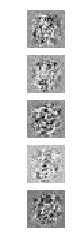

In [75]:
#or use the handy tf dense function
tf.reset_default_graph()
X=tf.placeholder(tf.float32,shape=(None,n_inputs),name="X")

he_init=tf.contrib.layers.variance_scaling_initializer()
l2_regularizer=tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer=partial(tf.layers.dense,activation=tf.nn.elu,
                      kernel_initializer=he_init,
                      kernel_regularizer=l2_regularizer)

hidden1=my_dense_layer(X,n_hidden1,name="hidden1")
hidden2=my_dense_layer(hidden1,n_hidden2,name="hidden2")
hidden3=my_dense_layer(hidden2,n_hidden3,name="hidden3")
outputs=my_dense_layer(hidden3,n_outputs,activation=None,name="outputs")

with tf.name_scope("loss"):
    reconstruction_loss=tf.reduce_mean(tf.square(outputs-X),name="loss")
    reg_loss=tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    loss=tf.add_n([reconstruction_loss]+reg_loss)
    
with tf.name_scope("train"):
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op=optimizer.minimize(loss)

init=tf.global_variables_initializer()
saver=tf.train.Saver()


n_test_digits=5
X_test_plot=np.random.normal(size=(n_test_digits,n_hidden3))

with tf.Session() as sess:
    init.run()
    try:
        saver.restore(sess, "model_checkpoints/mnist_auto_encoder1.ckpt")
    except:
        print("Model is not compatible with the checkpoint data")
    outputs_val=outputs.eval(feed_dict={hidden3:X_test_plot})

def plot_image(image,shape=[28,28]):
    plt.imshow(image.reshape(shape),cmap="Greys",interpolation="nearest")
    plt.axis("off")

for digit_index in range(n_test_digits):
    plt.subplot(n_test_digits,1,digit_index+1)
    plot_image(outputs_val[digit_index])